<a href="https://colab.research.google.com/github/bluelikemilk/DL_AdvancedComptuerVision/blob/main/TF2_0_Fashion_MNIST_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

2.7.0


# Load data

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model 

In [11]:
fashion_mnist = tf.keras.datasets.fashion_mnist
# load train and test data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# normalize the image intensity
x_train = x_train/255.0
x_test = x_test/255.0
# print out the data size
print('x_train.shape is ', x_train.shape)


x_train.shape is  (60000, 28, 28)


In [12]:
 # each image is 28 x 28 gray image, but conv2D also need channel dimension. 
 # So we need to expand dimension from N x H x W into N x H x W x C where C=1
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
# print out the expanded data size
print('x_train.shape is ', x_train.shape)

x_train.shape is  (60000, 28, 28, 1)


In [14]:
# get the number of class
K = len(set(y_train)) # store all labels into a set to ignore same values
print('Number of class is ', K)

Number of class is  10


# Build the model

In [16]:
# use functional API to build CNN model
i = Input(shape=(x_train[0].shape)) # input shape is H x W x C
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i) # first strided Conv layer, 32 feature maps, filter size 3 x 3
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x) # second strided Conv layer
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x) # third strided Conv layer
x = Flatten()(x) # flattern to prepare for dense layer
x = Dropout(0.2)(x) # dropout 20% to reduce overfitting
x = Dense(512, activation='relu')(x) # first Fully connected layer
x = Dropout(0.2)(x) # dropout 20% to reduce overfitting
x = Dense(K, activation='softmax')(x) # last Fully connected layer to generate K different classes

model = Model(i, x) # stack all layers to build the model

In [17]:
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# fit the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 26s 13ms/step - loss: 0.5144 - accuracy: 0.8099 - val_loss: 0.3928 - val_accuracy: 0.8567
Epoch 2/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3596 - accuracy: 0.8642 - val_loss: 0.3430 - val_accuracy: 0.8700
Epoch 3/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3096 - accuracy: 0.8834 - val_loss: 0.3173 - val_accuracy: 0.8839
Epoch 4/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2781 - accuracy: 0.8944 - val_loss: 0.3089 - val_accuracy: 0.8868
Epoch 5/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2522 - accuracy: 0.9046 - val_loss: 0.2963 - val_accuracy: 0.8952
Epoch 6/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2302 - accuracy: 0.9135 - val_loss: 0.2956 - val_accuracy: 0.8957
Epoch 7/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2123 - accuracy: 0.9186 - val_loss: 0.3011 -

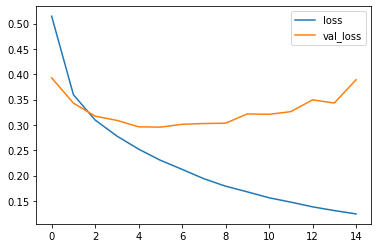

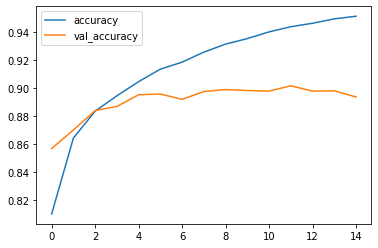

In [19]:
# plot loss and accuracy per epoch
plt.figure(1)
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

plt.figure(2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

# Plot misclassified label and examples

Confusion matrix, without normalization
[[872   1  17  10   2   1  88   0   9   0]
 [  6 968   1  15   4   1   4   0   1   0]
 [ 23   0 866  11  38   0  59   0   3   0]
 [ 14   3  22 881  54   0  24   0   2   0]
 [  0   1  91  10 813   0  80   0   5   0]
 [  0   0   0   0   0 956   0  32   1  11]
 [129   1  67  18  87   0 684   0  14   0]
 [  0   0   0   0   0   4   0 982   0  14]
 [  2   0   2   3   6   3   4   3 976   1]
 [  1   0   0   0   0   8   0  52   1 938]]


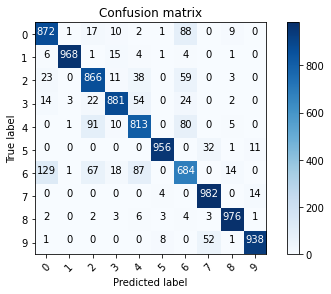

In [30]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix (cm, classes, normalize=False, 
                           title='Confusion matrix', 
                           cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[j, i] > thresh else "black")
  
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()



p_test = model.predict(x_test).argmax(axis=1) # predict will give each class a probability, and we find the index of max value of each row as the final prediction class
cm = confusion_matrix(y_test, p_test) # calculate confusion_matrix
plot_confusion_matrix(cm, list(range(K))) # plot the matrix

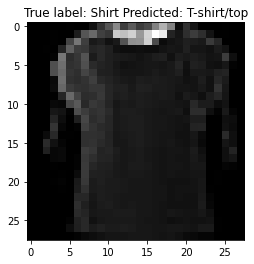

In [32]:
# plot label name to see which label is confused
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));